# Matplot lib - All your plotting functions under one roof (almost!)



Matplotlib is a simple (most of the time) plotting library. 

So let's have a try!



In [ ]:
# This will plot a simple scatter graph of points. 
# The points will have all different sizes just for visual appearance, as well as varied colours
%matplotlib inline
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Lets say we want to plot 50 points
N = 50

# Generate some random data
x = np.random.rand(N)
y = np.random.rand(N)

# Add a random colour field
colors = np.random.rand(N)

# Alter the size of the particles randomly
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses#

# Here we create a figure in an object orientated fashion, and call is 'ax' 
fig = plt.figure()
ax = fig.add_subplot(111)

# Let's plot it! Simple right? Plot x, y. Alpha = the transparency of the points - very useful! 
ax.scatter(x, y, s=area, c=colors, alpha=0.5)

# Now for some labels....and a title (they always help)
ax.set_xlabel('Random x')
ax.set_ylabel('Random y')
ax.set_title('Awesome! (but kind of pointless...)')

# Source: http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html 


# Exercise 1

## Now lets have a look at some real data! 


In [181]:
# First of all, lets read some data from a CSV file. 
#"Figure 1. Average Global Sea Surface Temperature, 1880-2015",,,
#Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators,,,"Data source: NOAA, 2016",,,
# Units: temperature anomaly (°F),,,
# https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv 

# Import our libraries
import csv
import matplotlib.pyplot as plt
import os

In [182]:
# We first need to find our file. 
file_name = os.path.join(os.path.pardir, 'data', 'sea-surface-temp_fig-1.csv')

### 2. `numpy.genfromtxt()`

In [183]:
## Header is 6 lines and we are going to read in the data

skip_rows = 6

## Read 'file_name' and call it 'data' 
## This is a simple .csv file. Go into the folder 'Data' and open it in Excel if you don't believe us! 
## Set delimiter for csv, we will skip the headers, and names=True means that columns have names we will use. 
data = np.genfromtxt(file_name, delimiter=',', skip_header=skip_rows, names=True, dtype=None)

## Name the data based on the column names
years = data['Year']
temperature = data['Annual_anomaly']

Note: `pandas.read_csv()` function has a similar functionality and returns similar data structure.

### 3. Plot a line graph of Average Ocean Temperature from 1880-Present

In [ ]:
### Time to create our plot and give it a red colour because it is alarming!
#fig = plt.figure()
#ax = fig.add_subplot(111)

#ax.plot(x_data, y_data, c='red')

### How about adding some labels? 
#ax.set_xlabel('Year')
#ax.set_ylabel('Temperature (oF)')
#ax.set_title('Annual Anomaly')

## Now lets see if we can make some subplots

In [184]:
# Here we are going to loop over the same dataset twice and product a subplot with a different colour. 
# Two data arrays are created - uncomment 'data' to see what the output looks like. 
data = [temperature for i in range(2)] 

In [185]:
# Create a colour scheme up to the value of 12. A simple array of numbers. 
colours = np.linspace(0.2,6,12) 

##### Trying playing with the value '6' what does it do and how does it effect the output? Why not try the other values too....maybe use 'b' to inset a cell below or comment the lines out so you have the origional code to go back too if you break it! 

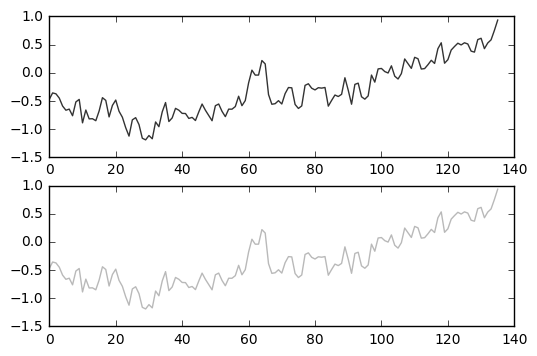

In [186]:
# Set a figure of 2 Vertical, by 1 Horizonal 
fig, ax = plt.subplots(2, 1)

# Loop over the two data arrays, 
for ix, arr, col in zip(ax.flat, data, colours):
    ix.plot(arr, color=str(col))


# Exercise 2

#### The next section is based upon marine data taken from the ICES dataset on the European Continental Shelf 

In [196]:
file_name = os.path.join(os.path.pardir, 'data', 'Shelf_sea_nuts.csv')
# Header is 6 lines and we are going to read in the data
skip_rows = 1

# Read 'file_name' and call it 'data' 
# This is a simple .csv file. Go into the folder 'Data' and open it in Excel if you don't believe us! 
data = np.genfromtxt(file_name, delimiter=',', names=True, dtype=None)
print(data.dtype)

# Name the data based on the column names
#ICES_year = data['']
#ICES_temperature = data['']
#ICES_Oxygen = data['']
#ICES_Nitrate = data['']

[('Year', '<i8'), ('TEMP', '<f8'), ('O2', '<f8'), ('NO3', '<f8')]


### Try to produce three plots of the above data. 
The simple task is to produce a scatter plot for each variable above, changing the colour, and transparency of the points. 

If you have time, how about using numpy.mean to mean the data via year, and then plot a line graph. If you get this far, try changing the 'linestyle' or 'ls' as you have done with colour and transparency. 

In [193]:
#fig = plt.figure()
#ax = fig.add_subplot(111)

#ax.???(???, ???, color=???, alpha=???)  # hint how about we try a scatter plot? 
#ax.set_xlabel('???')
#ax.set_ylabel('???')
#ax.set_title('???')

SyntaxError: invalid syntax (<ipython-input-193-5e5b9abb6779>, line 3)

### Scatter Plot and colour the points

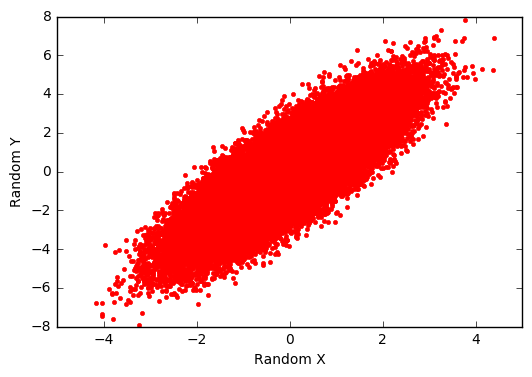

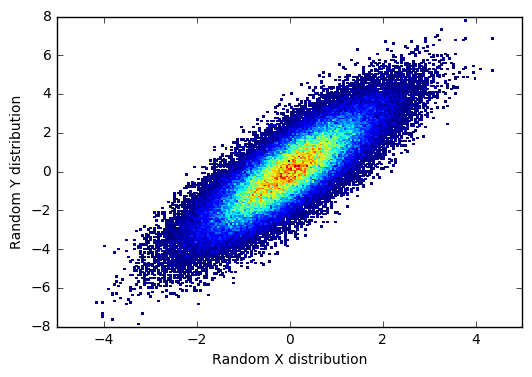

In [198]:
  # Create some random numbers
n = 100000
x = np.random.randn(n)
y = (1.5 * x) + np.random.randn(n)


# Plot data
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x,y,'.r')
ax.set_xlabel('Random X')
ax.set_ylabel('Random Y')

# Estimate the 2D histogram
nbins = 200
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)

# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)

# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
 
# Plot 2D histogram using pcolor
fig2 = plt.figure()
ax = fig2.add_subplot(111)

ax.pcolormesh(xedges,yedges,Hmasked)
ax.set_xlabel('Random X distribution')
ax.set_ylabel('Random Y distribution')

### Contour plots

In [ ]:
# Create a function for generating visual data
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

# Creates data
n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

# Object orientated 
fig4 = plt.figure()
ax = fig4.add_subplot(111)

# Plot a contour plot
ax.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap=plt.cm.hot)
C = ax.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)

# Do you want values inline with the contours? If so, uncomment me below!
#ax.clabel(C, inline=1, fontsize=10)

### Quiver Plots

In [ ]:
n = 8
X,Y = np.mgrid[0:n,0:n]

fig5 = plt.figure()
ax = fig5.add_subplot(111)

ax.quiver(X,Y)

In [ ]:
# Creates random data 
n = 8
X,Y = np.mgrid[0:n,0:n]
T = np.arctan2(Y-n/2.0, X-n/2.0)
R = 10+np.sqrt((Y-n/2.0)**2+(X-n/2.0)**2)
U,V = R*np.cos(T), R*np.sin(T)

# Plots using object orientated way
fig6 = plt.figure()
ax = fig6.add_subplot(111)

# Make a quiver plot. faceolour=allows it to be coloured. 
ax.quiver(X,Y,U,V,R, alpha=.5)
ax.quiver(X,Y,U,V, facecolor='None', linewidth=.5)
 
# Set the limits.
ax.set_xlim(-1,n)
ax.set_ylim(-1,n)

## Sources: 
#### https://oceanpython.org/2013/02/25/2d-histogram/ 
#### https://www.labri.fr/perso/nrougier/teaching/matplotlib/